In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.models import load_model
model = load_model("mera_Unet_flood_model.keras")

C:\Users\dhruv\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [75]:
test_image_rgb = cv2.imread(r"C:\Users\dhruv\Downloads\Assam_Flood_July16.jpeg")
test_image_rgb = cv2.resize(test_image_rgb, (256, 256))
test_image_rgb = test_image_rgb / 255.0

# Stack the same image 3 times to simulate 9 channels (for demo/testing only)
test_image_9ch = np.concatenate([test_image_rgb]*3, axis=-1)
test_image_9ch = np.expand_dims(test_image_9ch, axis=0)

predicted_mask = model.predict(test_image_9ch).squeeze()
# Binary mask (if your model outputs probabilities)
threshold = 0.5
binary_mask = (predicted_mask > threshold).astype(np.uint8)

# Calculate flood area
flood_area_coverage = (np.sum(binary_mask) / binary_mask.size) * 100

print(f"Flood Area Coverage: {flood_area_coverage:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
Flood Area Coverage: 26.22


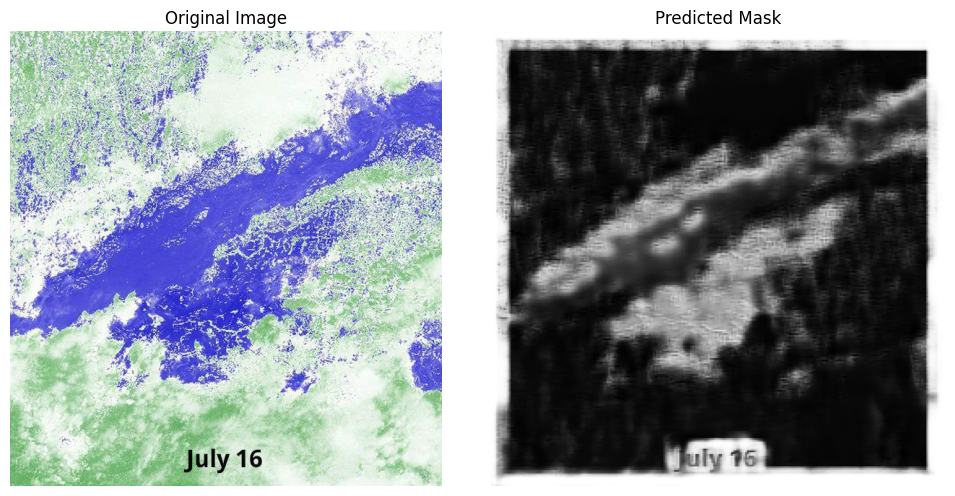

Flooded Area Coverage: 26.22%


In [77]:
import matplotlib.pyplot as plt
import cv2

# Load and prepare the original RGB image for display
original_image = cv2.imread(r"C:\Users\dhruv\Downloads\Assam_Flood_July16.jpeg")
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Plotting the original image and predicted mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

# Print flood coverage (ensure this is calculated already)
print(f"Flooded Area Coverage: {flood_area_coverage:.2f}%")